<a href="https://colab.research.google.com/github/Nabilaanggita/dashboard_nabila/blob/main/Nabila_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Nabila Anggita Luna]
- **Email:** [m296b4kx3180@bangkit.academy]
- **ID Dicoding:** [Nabila_anggita_luna]

## Menentukan Pertanyaan Bisnis

pertanyaan 1: seberapa pengaruh pelanggan untuk regis maupun tidak regis berdasarkan hari ?

Pertanyaan 2:
 pada saat kapan penyewa sepeda banyak peminatnya, berdasarkan keadaan alam?

## Import Semua Packages/Library yang Digunakan

In [8]:
#import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Data Wrangling

membaca masing masing data

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


file saya simpan di drive dan sudah saya buka aksesnya

In [1]:
pip install pandas

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Bangkit/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
#baca data daycsv
df = pd.read_csv('/content/drive/MyDrive/Bangkit/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Gathering Data

In [13]:
#Gathering 2 data day and hour

day_df = pd.read_csv("/content/drive/MyDrive/Bangkit/day.csv")
hour_df = pd.read_csv("/content/drive/MyDrive/Bangkit/hour.csv")

new_order_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    left_on="instant",
    right_on="instant"
)

#show data
print("\nnew_order_df:")
print(new_order_df.head())



new_order_df:
   instant    dteday_x  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
0        1  2011-01-01         1     0       1          0          6   
1        2  2011-01-02         1     0       1          0          0   
2        3  2011-01-03         1     0       1          0          1   
3        4  2011-01-04         1     0       1          0          2   
4        5  2011-01-05         1     0       1          0          3   

   workingday_x  weathersit_x    temp_x  ...  weekday_y  workingday_y  \
0             0             2  0.344167  ...          6             0   
1             0             2  0.363478  ...          6             0   
2             1             1  0.196364  ...          6             0   
3             1             1  0.200000  ...          6             0   
4             1             1  0.226957  ...          6             0   

   weathersit_y  temp_y  atemp_y  hum_y windspeed_y  casual_y  registered_y  \
0             1    0.24   0.2879  

**Insight:**
- Menngabungkan kedua data dengan innerjoin


### Assessing Data (day)

In [26]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [18]:
# Check for missing values
day_df.isnull().sum()




,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [22]:
#check duplicate data
day_df.duplicated().sum()

0

In [30]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#Outlier

new_order_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    left_on="instant",
    right_on="instant"
)
#chech outliers

numerical_cols = new_order_df.select_dtypes(include=np.number).columns

for col in numerical_cols:
  Q1 = new_order_df[col].quantile(0.25)
  Q3 = new_order_df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = new_order_df[(new_order_df[col] < lower_bound) | (new_order_df[col] > upper_bound)]


In [45]:
day_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


asessing data (hour)

In [46]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [23]:
# Check for missing values
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [25]:
#check duplicate data
hour_df.duplicated().sum()

0

In [28]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- tidak ada missing value pada data day maupun hour
- tidak ada duplikasi data pada semua data
- data sudah siap untuk digunakan




### Cleaning Data

In [32]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [33]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
#Drop The first and easiest method is to drop or remove all rows containing outliers

new_order_df.dropna(axis=0, inplace=True)

In [ ]:
#Imputation Replace outliers with a specific value

new_order_df.fillna(value=new_order_df.cnt_y.mean(), inplace=True)

In [ ]:
# Interpolation is a numerical approach used to calculate new data points based on the range of existing data.
new_order_df = new_order_df.infer_objects()


**Insight:**
- "Cleaning data using the methods of drop imputation and interpolation"
- data telah bersih semua

## Exploratory Data Analysis (EDA)

### Explore ...

In [41]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
#View the summary of statistical parameters of the data.

day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [36]:
#melihat data berdasarkan weathersit

new_order_df.groupby(by="weathersit_y").agg({
    "instant": "nunique",
    "cnt_y": ["max", "min", "mean", "std"]
})

instant cnt_y                          
             nunique   max min       mean        std
weathersit_y                                        
1                420   249   1  59.204762  50.347774
2                247   238   1  56.283401  48.807660
3                 63   155   1  32.714286  32.488424
4                  1    36  36  36.000000        NaN

**Insight:**
- pada saat cuaca buruk terdapat sedikit penyewa

kita lihat data yang tidak teregistrasi berdasarkan hari hari

In [49]:
# melihat data berdasarkan workingday pada saat casual


day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"]
})

instant casual                             
           nunique    max min         mean         std
workingday                                            
0              231   3410  54  1371.134199  873.064794
1              500   2469   2   606.570000  391.496032

In [51]:
# melihat data berdasarkan weekday pada saat casual


day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"]
    })

instant casual                             
        nunique    max min         mean         std
weekday                                            
0           105   3283  54  1338.295238  809.324777
1           105   3065   2   674.133333  493.777298
2           104   1348   9   556.182692  342.748705
3           104   2562   9   551.144231  401.808954
4           104   1405  15   590.961538  371.680307
5           104   2469  38   752.288462  483.422400
6           105   3410  57  1465.257143  927.082884

In [53]:
# melihat data berdasarkan holiday pada saat casual


day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"]
    })

instant casual                              
        nunique    max  min         mean         std
holiday                                             
0           710   3410    2   841.771831  680.528529
1            21   3065  117  1064.714286  860.046809

In [64]:
# melihat data berdasarkan holiday pada saat registerd


day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "registered": ["max", "min", "mean", "std"]
    })

instant registered                               
        nunique        max  min         mean          std
holiday                                                  
0           710       6946   20  3685.332394  1553.704431
1            21       5172  573  2670.285714  1492.860246

In [66]:
# melihat data berdasarkan workingday pada saat registerd


day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "registered": ["max", "min", "mean", "std"]
    })

instant registered                               
           nunique        max  min         mean          std
workingday                                                  
0              231       5966  451  2959.034632  1293.867686
1              500       6946   20  3978.250000  1568.692453

In [67]:
# melihat data berdasarkan weekday pada saat registerd


day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "registered": ["max", "min", "mean", "std"]
    })

instant registered                                
        nunique        max   min         mean          std
weekday                                                   
0           105       5657   451  2890.533333  1179.713036
1           105       6435    20  3663.990476  1504.215925
2           104       6697   573  3954.480769  1549.462149
3           104       6946   432  3997.394231  1723.710208
4           104       6781   416  4076.298077  1642.753330
5           104       6917  1129  3938.000000  1494.998698
6           105       5966   570  3085.285714  1358.068784

**Insight:**
- melihat jumlah masing masing jenis hari bedassarkan pelanggan cassual maupun registered
-

In [68]:
# melihat data berdasarkan weathersit


day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
    })

instant   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

**Insight:**
- melihat jumlah pelanggan yang menyewa pada saat beberapa jenis cuaca
-

## Visualization & Explanatory Analysis

### Pertanyaan 1:

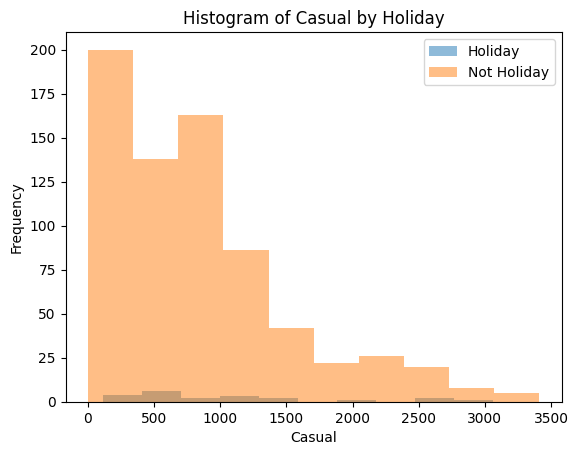

In [62]:
# tampilkan histogram day kolom holiday berdsarkan casual

plt.hist(day_df[day_df['holiday'] == 1]['casual'], bins=10, alpha=0.5, label='Holiday')
plt.hist(day_df[day_df['holiday'] == 0]['casual'], bins=10, alpha=0.5, label='Not Holiday')
plt.xlabel('Casual')
plt.ylabel('Frequency')
plt.title('Histogram of Casual by Holiday')
plt.legend()
plt.show()


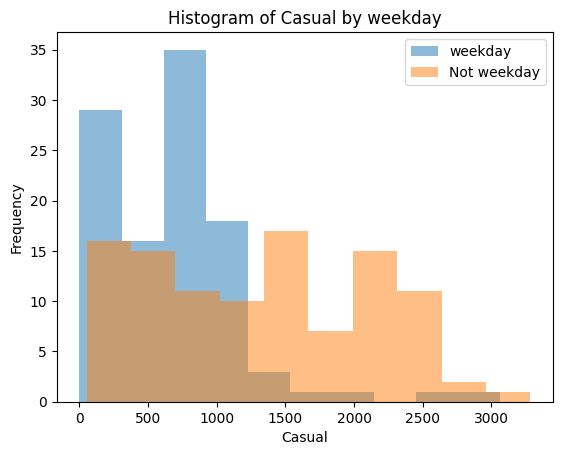

In [72]:
# tampilkan histogram day kolom weekday berdsarkan casual

plt.hist(day_df[day_df['weekday'] == 1]['casual'], bins=10, alpha=0.5, label='weekday')
plt.hist(day_df[day_df['weekday'] == 0]['casual'], bins=10, alpha=0.5, label='Not weekday')
plt.xlabel('Casual')
plt.ylabel('Frequency')
plt.title('Histogram of Casual by weekday')
plt.legend()
plt.show()


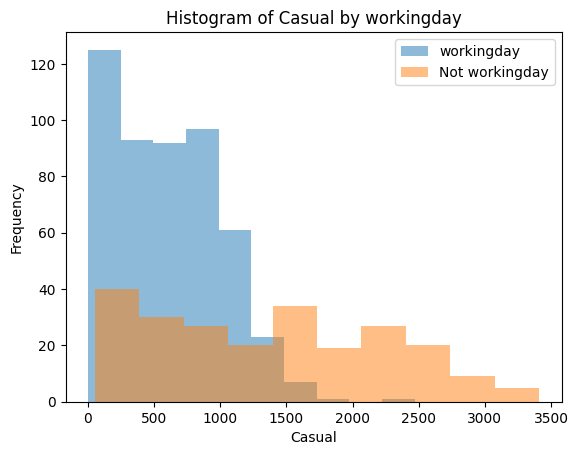

In [73]:
# tampilkan histogram day kolom workingday berdsarkan casual

plt.hist(day_df[day_df['workingday'] == 1]['casual'], bins=10, alpha=0.5, label='workingday')
plt.hist(day_df[day_df['workingday'] == 0]['casual'], bins=10, alpha=0.5, label='Not workingday')
plt.xlabel('Casual')
plt.ylabel('Frequency')
plt.title('Histogram of Casual by workingday')
plt.legend()
plt.show()

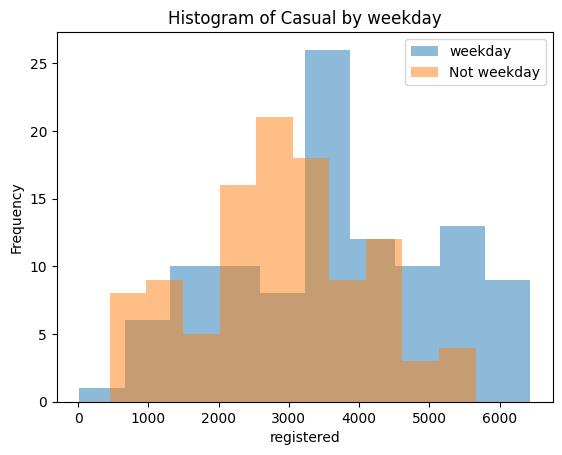

In [74]:
# tampilkan histogram day kolom weekday berdsarkan registered

plt.hist(day_df[day_df['weekday'] == 1]['registered'], bins=10, alpha=0.5, label='weekday')
plt.hist(day_df[day_df['weekday'] == 0]['registered'], bins=10, alpha=0.5, label='Not weekday')
plt.xlabel('registered')
plt.ylabel('Frequency')
plt.title('Histogram of Casual by weekday')
plt.legend()
plt.show()

In [ ]:
# tampilkan histogram day kolom workingday berdsarkan registered

plt.hist(day_df[day_df['workingday'] == 1]['registered'], bins=10, alpha=0.5, label='workingday')
plt.hist(day_df[day_df['workingday'] == 0]['registered'], bins=10, alpha=0.5, label='Not workingday')
plt.xlabel('Casual')
plt.ylabel('Frequency')
plt.title('Histogram of Casual by workingday')
plt.legend()
plt.show()

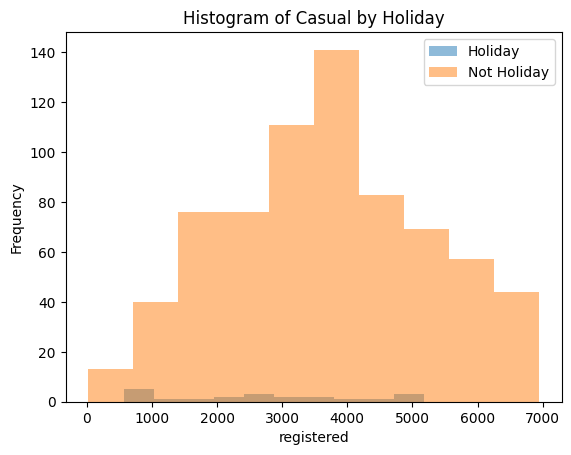

In [78]:
# tampilkan histogram day kolom holiday berdsarkan registered

plt.hist(day_df[day_df['holiday'] == 1]['registered'], bins=10, alpha=0.5, label='Holiday')
plt.hist(day_df[day_df['holiday'] == 0]['registered'], bins=10, alpha=0.5, label='Not Holiday')
plt.xlabel('registered')
plt.ylabel('Frequency')
plt.title('Histogram of Casual by Holiday')
plt.legend()
plt.show()


**Insight:**
- jumlah pelanggan pada saat holiday sangat sedikit
- jumlah terbanyak pelanggan terbanyak pda saat workingday

### Pertanyaan 2:

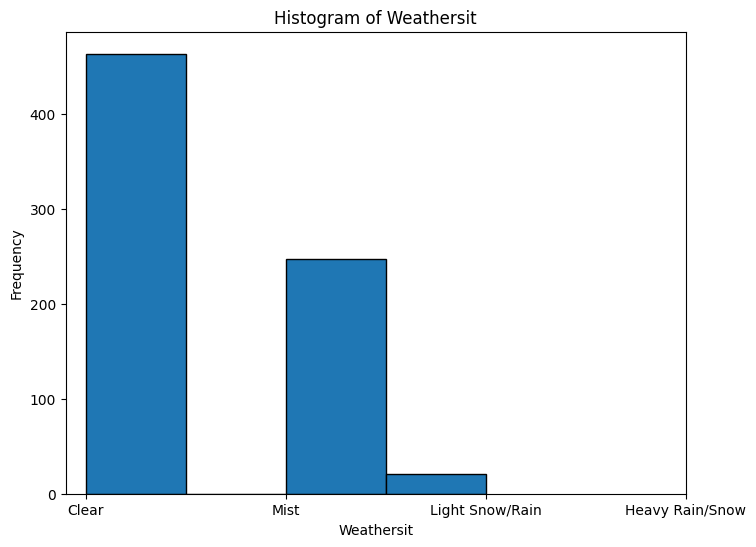

In [82]:
plt.figure(figsize=(8, 6))
plt.hist(day_df['weathersit'], bins=4, edgecolor='black')
plt.xlabel('Weathersit')
plt.ylabel('Frequency')
plt.title('Histogram of Weathersit')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()

**Insight:**
- bagan ini menyatan pada saat cuaca buruk peminat sewa sangat sedikit

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1: pada saat hari kerja banyak peminat bersepda banyak daripada saat hari libur. dan  banyak orang memilih untuk mendaftar pada saat bekerja. ini dikarenakan seorang pekerja rutin memakai sepeda saat akan bekerja dan mereka lebih praktis untuk menjadi anggota terdaftar

- Conclusion pertanyaan 2 :Ketika cuaca sangat buruk, hanya ada sedikit peminat penyewaan sepeda. Ini mungkin karena mereka tidak ingin mengambil risiko terjadi sesuatu yang buruk. Saran saya adalah tidak apa-apa jika permintaan menurun selama cuaca buruk, karena menggunakan produk dalam cuaca buruk dapat menyebabkan kerusakan.